In [337]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# I.  Data Prep & Exploratory

## I.1. Section 2 Data Set:  Martindale-Avvo

In [219]:
# Section 2 Data Set  //  Martindale-Avvo
df = pd.read_excel('/Users/ryanha/Documents/0. RHa Personal Account/IB Case Study/InternetBrands_CaseStudyDataSet  - (RyanHa Workbook - 6.11.20).xlsx', sheet_name='Section 2 Data Set')


In [220]:
df.head(5)

,attorney_id,specialty_id
0,100000,218
1,100001,263
2,100001,436
3,100001,218
4,100001,481


In [4]:
df.tail(5)

,attorney_id,specialty_id
199995,166183,658
199996,166186,723
199997,166186,202
199998,166186,385
199999,166186,218


In [24]:
df.describe

<bound method NDFrame.describe of         attorney_id specialty_id
0            100000          218
1            100001          263
2            100001          436
3            100001          218
4            100001          481
...             ...          ...
199995       166183          658
199996       166186          723
199997       166186          202
199998       166186          385
199999       166186          218

[200000 rows x 2 columns]>

## I.2.  Extrapolating Specialty Ratings (Implicit)

In [229]:
# Since there is no "Ratings" data set, let's make our own.
# There are 200k "Specialty_ID" records.
# I will extrapolate implicit ratings from the the totality of these records as follows:
##  Bins of 40K, Ratings 1-5, as the records get more frequent  (Ascending).

df_ratings = pd.read_excel('/Users/ryanha/Documents/0. RHa Personal Account/IB Case Study/InternetBrands_CaseStudyDataSet  - (RyanHa Workbook - 6.11.20).xlsx', sheet_name='s_extrapolated_ratings')

In [230]:
df_ratings.head(5)

,specialty_id,count_specialty_id,rating
0,218,14780,5
1,258,9856,5
2,429,9608,5
3,257,8615,5
4,373,8245,4


## I.3. Merging Dataframes and Ratings

In [270]:
df_data = pd.merge(df_ratings, df, on='specialty_id')

In [271]:
df_data.head(5)

,specialty_id,count_specialty_id,rating,attorney_id
0,218,14780,5,100000
1,218,14780,5,100001
2,218,14780,5,100003
3,218,14780,5,100010
4,218,14780,5,100012


## I.4. Describing Our Dataframe

In [272]:
df_data.describe()

,specialty_id,count_specialty_id,rating,attorney_id
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,439.721915,5032.331280,3.025020,132962.924640
std,216.265813,4054.953149,1.437044,19127.743635
min,109.000000,14.000000,1.000000,100000.000000
25%,256.000000,1619.000000,2.000000,116410.500000
50%,385.000000,3608.000000,3.000000,132966.000000
75%,659.000000,8245.000000,4.000000,149511.500000
max,910.000000,14780.000000,5.000000,166186.000000


In [275]:
df_data.head(5)

,specialty_id,count_specialty_id,rating,attorney_id
0,218,14780,5,100000
1,218,14780,5,100001
2,218,14780,5,100003
3,218,14780,5,100010
4,218,14780,5,100012


In [277]:
df_data.groupby('specialty_id')['rating'].mean().head(10)

specialty_id
109    1
191    1
192    1
193    1
194    1
196    1
197    1
198    1
199    3
200    1
Name: rating, dtype: int64

In [278]:
df_data.groupby('specialty_id')['rating'].mean().tail(10)

specialty_id
892    1
894    1
895    2
896    1
897    1
898    1
900    2
901    2
909    1
910    1
Name: rating, dtype: int64

In [279]:
df_data.groupby('specialty_id')['rating'].mean().sort_values(ascending=False).head()

specialty_id
257    5
429    5
218    5
258    5
428    4
Name: rating, dtype: int64

## I.5. Total Numbers of Ratings

In [281]:
# The really popular Specialty Areas of Practice are on Top.

df_data.groupby('specialty_id')['rating'].count().sort_values(ascending=False).head()

specialty_id
218    14780
258     9856
429     9608
257     8615
373     8245
Name: rating, dtype: int64

## I.6. Ratings Mean Count

In [282]:
ratings_mean_count = pd.DataFrame(df_data.groupby('specialty_id')['rating'].mean())

In [284]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_data.groupby('specialty_id')['rating'].count())

In [285]:
ratings_mean_count.head()

,rating,rating_counts
specialty_id,,
109,1,90
191,1,1078
192,1,14
193,1,388
194,1,296


# II.  Correlations Coefficients:  Applying "Pearson's R"

In [25]:
# Create a dataframe with the count for each "specialty_id" and "attorney_id".
# Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.

## II.1.  Collaborative Filtering

In [27]:
# Collaborative filtering the behavior of a group of users is used to make recommendations to other users. 
# Recommendation is based on the preference of other users.

## Ours will likely be based off of an "User-Base Collaborative Filtering" method.

## II.2. Pearson Correlation Coefficient

In [26]:
# Implementation of "Pearson Correlation Coefficient" or "Pearson's R".
# ID's that have a high correlation coefficient are are most similar to each other.

## This number will lie between -1 and 1. 
## 1 indicates a positive linear correlation while -1 indicates a negative correlation. 
## 0 indicates no linear correlation. Therefore movies with a zero correlation are not similar at all.

## No Machine Learning for this Recommender System.  Just good ol' Collaborative Filtering.

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.dataanalytics.org.uk/wp-content/uploads/2019/06/Figure-8.11.png")

## II.3. Plotting the Distribution of Attorney and Specialty ID's

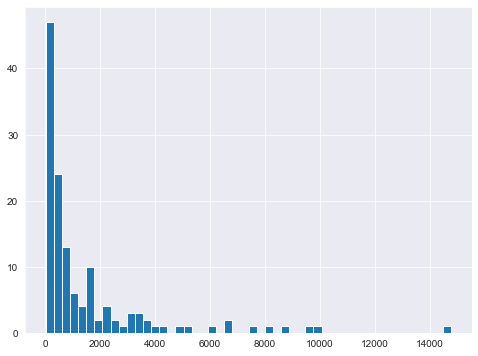

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

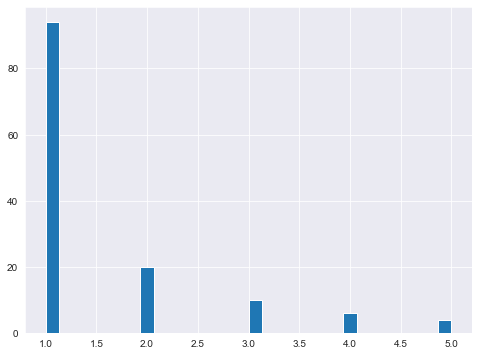

In [290]:
# Plotting a histogram for average ratings

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=30)

<Figure size 576x432 with 0 Axes>

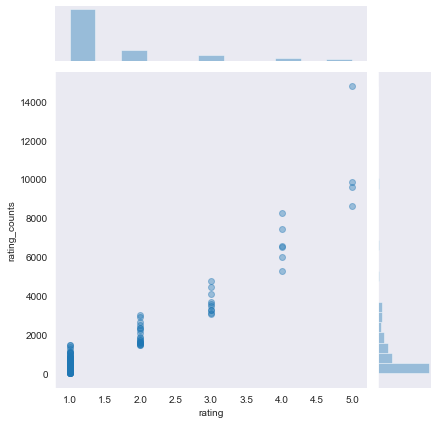

In [291]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

# III.  Collaborative Filtering:
# Finding Correlations Between Attorneys & Specialty Areas

## III.1. Creating Matrix of Attorneys and Specialties

In [293]:
# Create the matrix of attorney_id and corresponding attorney "ratings"

id_matrix = df_data.pivot_table(index='attorney_id', columns='specialty_id', values='rating')

In [483]:
id_matrix.shape

(39369, 134)

In [294]:
id_matrix.head()

specialty_id,109,191,192,193,194,196,197,198,199,200,...,892,894,895,896,897,898,900,901,909,910
attorney_id,,,,,,,,,,,,,,,,,,,,,
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
id_matrix.tail(5)

specialty_id,109,191,192,193,194,196,197,198,199,200,...,892,894,895,896,897,898,900,901,909,910
attorney_id,,,,,,,,,,,,,,,,,,,,,
166178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166181,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## III.2. KeyError Fix:  Convert Float64 to Object 

In [400]:
lst = list(id_matrix)

In [401]:
lst

[109,
 191,
 192,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 202,
 203,
 204,
 205,
 206,
 208,
 209,
 217,
 218,
 229,
 241,
 243,
 251,
 252,
 253,
 255,
 256,
 257,
 258,
 259,
 262,
 263,
 264,
 265,
 267,
 268,
 269,
 277,
 289,
 301,
 313,
 325,
 337,
 349,
 361,
 373,
 385,
 422,
 423,
 424,
 425,
 427,
 428,
 429,
 430,
 431,
 433,
 434,
 435,
 436,
 437,
 439,
 440,
 448,
 449,
 471,
 481,
 482,
 483,
 484,
 486,
 487,
 488,
 489,
 490,
 492,
 493,
 494,
 495,
 496,
 498,
 499,
 653,
 654,
 655,
 656,
 658,
 659,
 660,
 661,
 662,
 664,
 665,
 666,
 667,
 668,
 670,
 671,
 679,
 680,
 702,
 712,
 713,
 714,
 716,
 717,
 718,
 720,
 722,
 723,
 724,
 725,
 726,
 728,
 729,
 730,
 883,
 884,
 885,
 886,
 888,
 889,
 890,
 891,
 892,
 894,
 895,
 896,
 897,
 898,
 900,
 901,
 909,
 910]

In [402]:
id_matrix[lst] = id_matrix[lst].astype(str)

In [334]:
# old:  before conversion

print(id_matrix.dtypes)

specialty_id
109    float64
191    float64
192    float64
193    float64
194    float64
        ...   
898    float64
900    float64
901    float64
909    float64
910    float64
Length: 134, dtype: object


In [407]:
#new

print(id_matrix.dtypes)

specialty_id
109    object
191    object
192    object
193    object
194    object
        ...  
898    object
900    object
901    object
909    object
910    object
Length: 134, dtype: object


## III.3. Choosing Our Test Subjects

In [399]:
# Top and Bottom 10 Attorney ID's

ratings_mean_count.sort_values('rating_counts', ascending=False).head(10)

,rating,rating_counts
specialty_id,,
218,5,14780
258,5,9856
429,5,9608
257,5,8615
373,4,8245
713,4,7417
385,4,6554
712,4,6531
255,4,5988


In [398]:
print(ratings_mean_count.dtypes)

rating           int64
rating_counts    int64
dtype: object


In [408]:
print(df_data.dtypes)

specialty_id          category
count_specialty_id       int64
rating                   int64
attorney_id              int64
dtype: object


In [409]:
df_data.head(5)

,specialty_id,count_specialty_id,rating,attorney_id
0,218,14780,5,100000
1,218,14780,5,100001
2,218,14780,5,100003
3,218,14780,5,100010
4,218,14780,5,100012


In [430]:
id_matrix.head(5)

specialty_id,109,191,192,193,194,196,197,198,199,200,...,892,894,895,896,897,898,900,901,909,910
attorney_id,,,,,,,,,,,,,,,,,,,,,
100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100002,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [439]:
for col in id_matrix.columns: 
    print(col) 

109
191
192
193
194
196
197
198
199
200
202
203
204
205
206
208
209
217
218
229
241
243
251
252
253
255
256
257
258
259
262
263
264
265
267
268
269
277
289
301
313
325
337
349
361
373
385
422
423
424
425
427
428
429
430
431
433
434
435
436
437
439
440
448
449
471
481
482
483
484
486
487
488
489
490
492
493
494
495
496
498
499
653
654
655
656
658
659
660
661
662
664
665
666
667
668
670
671
679
680
702
712
713
714
716
717
718
720
722
723
724
725
726
728
729
730
883
884
885
886
888
889
890
891
892
894
895
896
897
898
900
901
909
910


In [467]:
# Top Specialty Areas

# top_s_ratings1 = df_data['specialty_id']

In [474]:
# Top Specialty Areas

top_s_ratings1 = id_matrix[lst]

In [462]:
top_s_ratings2 = id_matrix[col]

In [475]:
top_s_ratings1.head(20)

specialty_id,109,191,192,193,194,196,197,198,199,200,...,892,894,895,896,897,898,900,901,909,910
attorney_id,,,,,,,,,,,,,,,,,,,,,
100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100002,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100008,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100010,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100011,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100012,nan,nan,nan,nan,nan,nan,nan,nan,3.0,nan,...,nan,nan,nan,nan,nan,nan,2.0,nan,nan,nan


In [463]:
top_s_ratings2.head(20)

attorney_id
100000    nan
100001    nan
100002    nan
100003    nan
100005    nan
100008    nan
100010    nan
100011    nan
100012    nan
100013    nan
100015    nan
100018    nan
100019    nan
100020    nan
100021    nan
100023    nan
100028    nan
100029    nan
100032    nan
100033    nan
Name: 910, dtype: object

In [424]:
top_s_ratings.head(20)

0     218
1     218
2     218
3     218
4     218
5     218
6     218
7     218
8     218
9     218
10    218
11    218
12    218
13    218
14    218
15    218
16    218
17    218
18    218
19    218
Name: specialty_id, dtype: category
Categories (134, int64): [109, 191, 192, 193, ..., 900, 901, 909, 910]

## III.3. Finding the Correlation Values

In [476]:
like_s = id_matrix.corrwith(top_s_ratings1)

In [477]:
corr_top_s = pd.DataFrame(like_s, columns=['Correlation'])
corr_top_s.dropna(inplace=True)
corr_top_s.head(5)

,Correlation


In [478]:
corr_top_s.sort_values('Correlation', ascending=False).head(10)

,Correlation


In [479]:
corr_top_s = corr_top_s.join(ratings_mean_count['rating_counts'])
corr_top_s.head()

,Correlation,rating_counts


## III.4. Sorting the Top 5 Correlated Specialty Areas

In [482]:
# Sort by Top 5

corr_top_s[corr_top_s['rating_counts']>50].sort_values('Correlation', ascending=False).head(5)

,Correlation,rating_counts


## III.5. Test 2:  Pearsons

In [484]:
def pearson(s1,s2):
    """take two pd.series objs and returns a correlation"""
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(s1_c ** 2) * np.sum(s2_c ** 2)

In [ ]:
pearson(id_matrix['218'], id_matrix['258'])

In [ ]:
def top_recs(specialty_id, id_matrix, num):
    """takes in attorney_id, id_matrix, and number of closest returned"""
    
    ratings = []
    for sp_id in id_matrix.columns:
        if sp_id == specialty_id:
            continue
        cor = pearson(id_matrix[specialty_id], id_matrix[sp_id])
        if np.isnan(cor):
            continue
        else:
            ratings.append((sp_id,cor))
            
    ratings.sort(key=lamba tup: tup[1], reverse=True)
    return ratings[:num]

# IV. Conclusion

In [ ]:
# Note:  I was unable to get this Recommender System to successfully execute.  
## This is merely my thought-process, and the steps I would take to tackle the problem.
### I was having difficulty in Section III.3 --  unable to identifying the specialty_id as an object or category.
### In any case, my strategy was to caculate the Pearsons R between two similar areas.
### Then sorting it by the top 5, revealing areas of closest similarity based on distance.